In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile

# Path to the zip in Drive
zip_path = "/content/drive/MyDrive/train.zip"

# Extract to Colab working directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/images')


In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm

IMG_SIZE = 128
DATADIR = "/content/images/train"
CATEGORIES = ["cat", "dog"]

X = []
y = []

for img_name in tqdm(os.listdir(DATADIR)):
    label = 0 if img_name.startswith("cat") else 1
    img_path = os.path.join(DATADIR, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

print("✅ Loaded", len(X), "images.")


100%|██████████| 2000/2000 [00:02<00:00, 918.06it/s]

✅ Loaded 2000 images.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
print("✅ Model trained.")


✅ Model trained.



📊 Classification Report:

              precision    recall  f1-score   support

         cat       0.50      0.54      0.52       194
         dog       0.53      0.48      0.50       206

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400



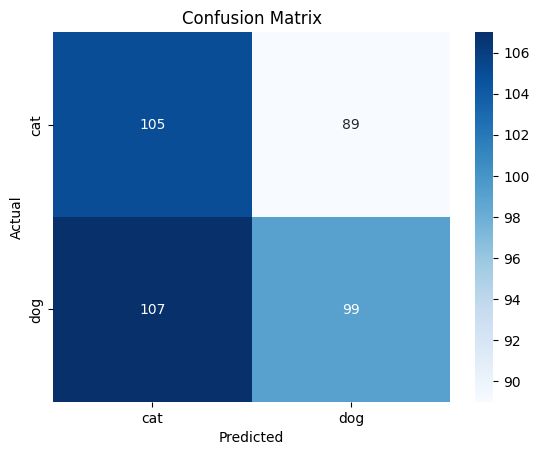

In [5]:
y_pred = model.predict(X_test)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=CATEGORIES))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


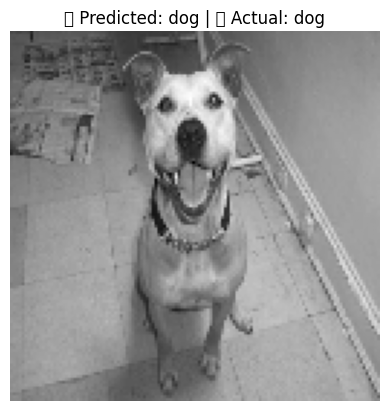

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


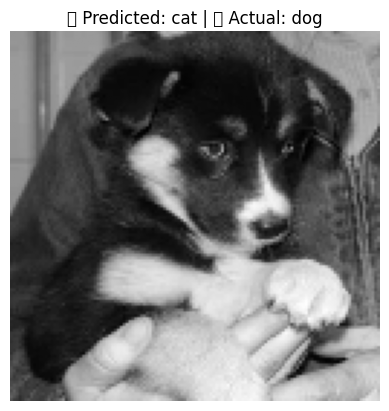

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


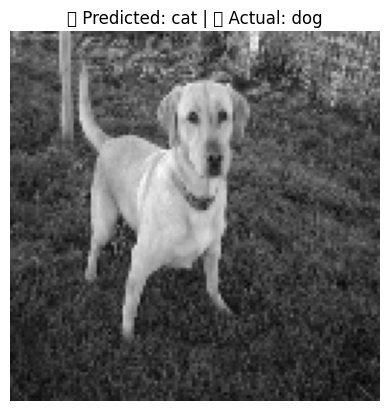

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


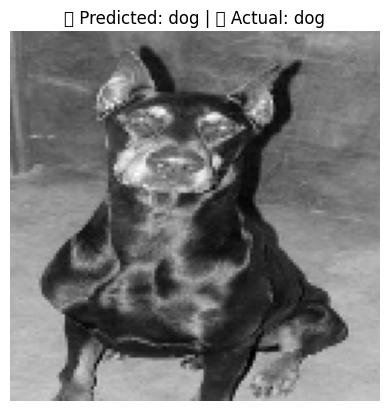

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


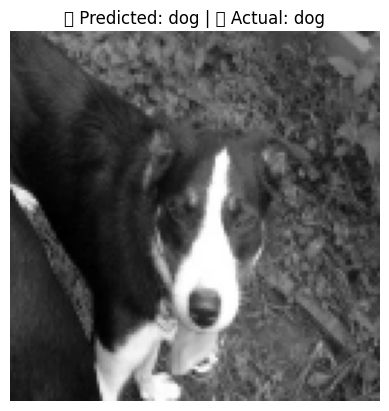

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set image size again for reshaping
IMG_SIZE = 128

# Visual predictions for 5 random test samples
for i in range(5):
    idx = np.random.randint(0, len(X_test))   # Random test index

    # Get test image and reshape
    img = X_test[idx].reshape(IMG_SIZE, IMG_SIZE)

    # Get actual and predicted label
    actual = CATEGORIES[y_test[idx]]
    pred = CATEGORIES[model.predict([X_test[idx]])[0]]

    # Display image with prediction
    plt.imshow(img, cmap="gray")
    plt.title(f"🔍 Predicted: {pred} | ✅ Actual: {actual}")
    plt.axis('off')
    plt.show()
